In [38]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

### 导入数据
定义10000为频率，低于10000频率的不计为词表，index_from即是从词表第三个开始。

In [39]:
imdb = keras.datasets.imdb
vocab_size = 10000
index_from = 3
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = vocab_size, index_from = index_from)


In [40]:
print(train_data[0], train_labels[0])
print(train_data.shape, train_labels.shape)
print(len(train_data[0]), len(train_data[1]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 1
(25000,) (25000,)
218 189


In [41]:
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [42]:
word_index = {k : (v+3) for k, v in word_index.items()}

In [43]:
word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['<UNK>'] = 2
word_index['<END>'] = 3
reverse_word_index = dict([value, key] for key, value in word_index.items())
reverse_word_index

{34704: 'fawn',
 52009: 'tsukino',
 52010: 'nunnery',
 16819: 'sonja',
 63954: 'vani',
 1411: 'woods',
 16118: 'spiders',
 2348: 'hanging',
 2292: 'woody',
 52011: 'trawling',
 52012: "hold's",
 11310: 'comically',
 40833: 'localized',
 30571: 'disobeying',
 52013: "'royale",
 40834: "harpo's",
 52014: 'canet',
 19316: 'aileen',
 52015: 'acurately',
 52016: "diplomat's",
 25245: 'rickman',
 6749: 'arranged',
 52017: 'rumbustious',
 52018: 'familiarness',
 52019: "spider'",
 68807: 'hahahah',
 52020: "wood'",
 40836: 'transvestism',
 34705: "hangin'",
 2341: 'bringing',
 40837: 'seamier',
 34706: 'wooded',
 52021: 'bravora',
 16820: 'grueling',
 1639: 'wooden',
 16821: 'wednesday',
 52022: "'prix",
 34707: 'altagracia',
 52023: 'circuitry',
 11588: 'crotch',
 57769: 'busybody',
 52024: "tart'n'tangy",
 14132: 'burgade',
 52026: 'thrace',
 11041: "tom's",
 52028: 'snuggles',
 29117: 'francesco',
 52030: 'complainers',
 52128: 'templarios',
 40838: '272',
 52031: '273',
 52133: 'zaniacs',

In [44]:
def decode(text_ids):
    return ' '.join([reverse_word_index.get(word_id, '<UNK>') for word_id in text_ids])
decode(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

### 数据补全
使用keras的工具，padding填充有两种选择，一种是post，一种是pre，post则是在后面填充，pre是在前面填充。

In [45]:
max_length = 500
train_data = keras.preprocessing.sequence.pad_sequences(
     train_data,
     value = word_index['<PAD>'],
     padding = 'post',
     maxlen = max_length
) 

test_data = keras.preprocessing.sequence.pad_sequences(
     test_data,
     value = word_index['<PAD>'],
     padding = 'post',
     maxlen = max_length
)

### 定义模型
Embedding层：首先定义了一个数组，vocabulary_size x embedding大小的矩阵，其实就是one-hot编码的矩阵，然后每一个句子就去这个矩阵查，拼接成一个max_length x embedding的矩阵，所以embadding层得到的是一个batch_size x max_length x embedding的矩阵。
GlobalAveragePooling1D层：Embadding得到的是三维的矩阵，自然不能训练，而Global层就是去掉max_length层变成二维

In [46]:
embedding_dim = 16
batch_size = 128
model = keras.models.Sequential()
model.add(keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 16)           160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                1088      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 161,153
Trainable params: 161,153
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [48]:
history = model.fit(train_data, train_labels, epochs=15, batch_size = batch_size, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/15
20000/20000 [==============================] - 3s 129us/sample - loss: 0.6848 - accuracy: 0.5954 - val_loss: 0.6512 - val_accuracy: 0.7468
Epoch 2/15
20000/20000 [==============================] - 2s 89us/sample - loss: 0.5456 - accuracy: 0.8015 - val_loss: 0.4385 - val_accuracy: 0.8428
Epoch 3/15
20000/20000 [==============================] - 2s 99us/sample - loss: 0.3598 - accuracy: 0.8710 - val_loss: 0.3385 - val_accuracy: 0.8726
Epoch 4/15
20000/20000 [==============================] - 2s 86us/sample - loss: 0.2787 - accuracy: 0.8971 - val_loss: 0.3066 - val_accuracy: 0.8810
Epoch 5/15
20000/20000 [==============================] - 2s 95us/sample - loss: 0.2382 - accuracy: 0.9147 - val_loss: 0.2928 - val_accuracy: 0.8848
Epoch 6/15
20000/20000 [==============================] - 2s 85us/sample - loss: 0.2100 - accuracy: 0.9236 - val_loss: 0.2830 - val_accuracy: 0.8888
Epoch 7/15
20000/20000 [==============================] 

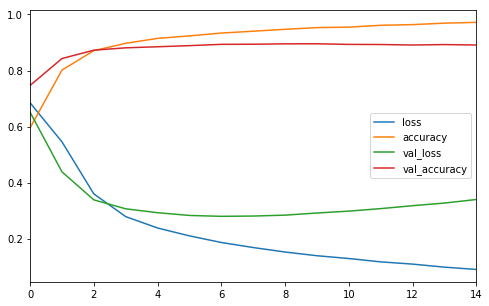

In [49]:
def plot_loss(history):
    pd.DataFrame(history.history).plot(figsize = (8, 5))
    plt.show()
plot_loss(history)

In [50]:
model.evaluate(test_data, test_labels, batch_size=batch_size)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.35795946621894836, 0.878]

### RNN
units是输出向量长度

In [51]:
embedding_dim = 16
batch_size = 128
model = keras.models.Sequential()
model.add(keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(keras.layers.SimpleRNN(units=64, return_sequences=False))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(train_data, train_labels, epochs=15, batch_size = batch_size, validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 16)           160000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                5184      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 169,409
Trainable params: 169,409
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/15
20000/20000 [==============================] - 48s 2ms/sample - loss: 0.6949 - accuracy: 0.5044 - val_loss: 0.6977 - val_accuracy: 0.4958
Epoch 2/15
20000/20000 [========================

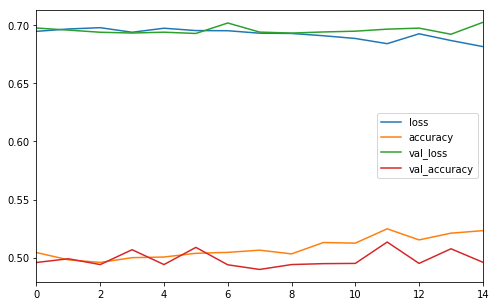

In [52]:
plot_loss(history)

In [53]:
embedding_dim = 16
batch_size = 128
model = keras.models.Sequential()
model.add(keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(keras.layers.Bidirectional(keras.layers.SimpleRNN(units=64, return_sequences=True)))
model.add(keras.layers.Bidirectional(keras.layers.SimpleRNN(units=64, return_sequences=False)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(train_data, train_labels, epochs=15, batch_size = batch_size, validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 500, 128)          10368     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               24704     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 203,393
Trainable params: 203,393
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/15
20000/20000 [==============================] - 202s 10

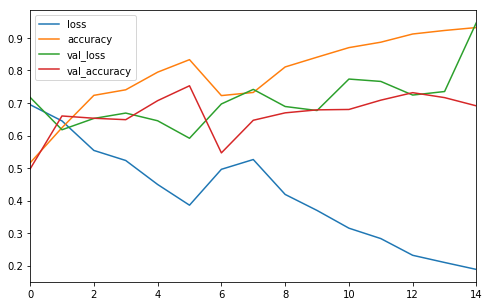

In [54]:
plot_loss(history)

In [55]:
embedding_dim = 16
batch_size = 128
model = keras.models.Sequential()
model.add(keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(keras.layers.Bidirectional(keras.layers.SimpleRNN(units=64, return_sequences=False)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(train_data, train_labels, epochs=15, batch_size = batch_size, validation_split=0.2)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 16)           160000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               10368     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 178,689
Trainable params: 178,689
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/15
20000/20000 [==============================] - 80s 4ms/sample - loss: 0.6984 - accuracy: 0.5045 - val_loss: 0.6951 - val_accuracy: 0.4974
Epoch 2/15
20000/20000 [========================

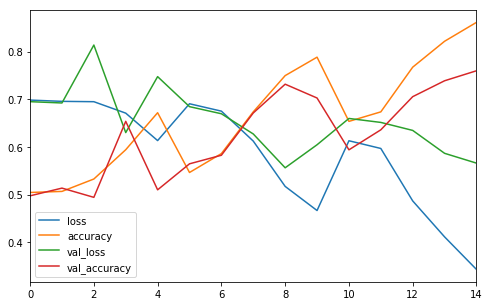

In [56]:
plot_loss(history)

In [ ]:
embedding_dim = 16
batch_size = 128
model = keras.models.Sequential()
model.add(keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(keras.layers.LSTM(units=32, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(train_data, train_labels, epochs=15, batch_size = batch_size, validation_split=0.2)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 16)           160000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                6272      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 168,449
Trainable params: 168,449
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/15
18816/20000 [===========================>..] - ETA: 4s - loss: 1294.1181 - accuracy: 0.5028

In [ ]:
plot_loss(history)